In [1]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import keras.backend as K
import skimage.io as io
import skimage.transform as tr
import matplotlib.pyplot as plt
from glob import glob
from keras.optimizers import *
%matplotlib inline

from loss_metrics import *
from helper import * 


Using TensorFlow backend.


In [39]:
# load the model
model = load_model('/home/dan/Desktop/Datenset_Tower/results/training_03.h5', custom_objects={'iou_loss': iou_loss})
#model.compile(optimizer=Adam(lr=0.0001), loss=iou_loss, metrics=['accuracy'])

In [40]:
x = None
x = read_imgs('/home/dan/Desktop/Datenset_Tower/test/images/data/*.png', (224,224,1))
y = None
y = read_imgs('/home/dan/Desktop/Datenset_Tower/test/masks/data/*.png', (224,224,1))

/home/dan/.conda/envs/tf-gpu/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/dan/.conda/envs/tf-gpu/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/home/dan/.conda/envs/tf-gpu/lib/python3.6/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800


In [41]:
pred = model.predict(x, verbose=1)

3922/3922 [==============================] - 16s 4ms/step


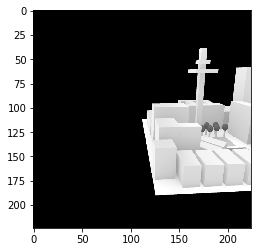

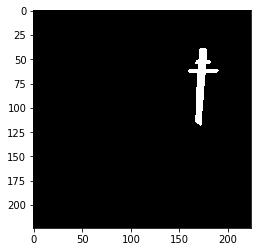

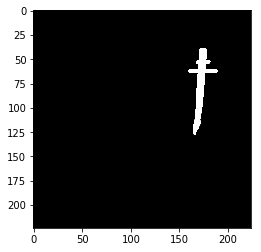

IndexError: index 1 is out of bounds for axis 2 with size 1

In [48]:
# Plots the prediction in jupyter notebook for comparison
i = 460

# Input Picture
plt.imshow(x[i, ..., 0], cmap='gray')
plt.show()

# Prediction as RGB
#plt.imshow(pred[i])
#plt.show()

# Ground Truth
plt.imshow(y[i][:,:,0], cmap = 'gray')
plt.show()

# Prediction Dim 0
plt.imshow(pred[i][:,:,0], cmap = 'gray')
plt.show()

# Prediction Dim 1
plt.imshow(pred[i][:,:,1], cmap = 'gray')
plt.show()

# Prediction Dim 2
plt.imshow(pred[i][:,:,2], cmap = 'gray')
plt.show()



In [49]:
print('DSC:       ' + str(f1_np(y, pred)))
print('IoU:       ' + str(iou_np(y, pred)))
print('Precision: ' + str(precision_np(y, pred)))
print('Recall:    ' + str(recall_np(y, pred)))
print('Error:     ' + str(error_np(y, pred)))

DSC:       0.5907045531098558
IoU:       0.41914894983936873
Precision: 0.6400522310434714
Recall:    0.5484217370854018
Error:     0.007871819726275134
